<a href="https://colab.research.google.com/github/u5633772/u5633772-DataScience-GenAI-Submissions/blob/main/Diabetes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [ ]:
import pandas as pd

# Assuming the CSV file is named 'diabetes.csv' inside the downloaded directory
df = pd.read_csv(f"{path}/diabetes.csv")

display(df.head(20))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


AI prompt: Import the dataset in the dataframe and display firsst 20 rows

I imported the dataset as a dataframe and checked the values (first 20 rows)make sense. There is a clear outcome shown of whether the patient has diabetes or not.


In [ ]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


AI:

Complie the descriptive statistics for the dataset

Check for null values


Descriptive Stats:

The count is the same for all features - 768, this could mean there are no null values so I double checked the df for null values and as expected no null/missing values.

The higher quartiles and values (75% and max) for pregnancies are shown to have a positive outcome (1), this could indicate there is a relationship between number of pregnacies and a positive diagnosis.

Another similar correlation would be of glucose and outcome. This is makes sense as positive cases of diabetes can cause high glucose/sugar level. If time, would be interesting to compare which is more correlated no. of pregnancies or glucose level.

In [ ]:
correlation_matrix = df.corr()
display(correlation_matrix)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


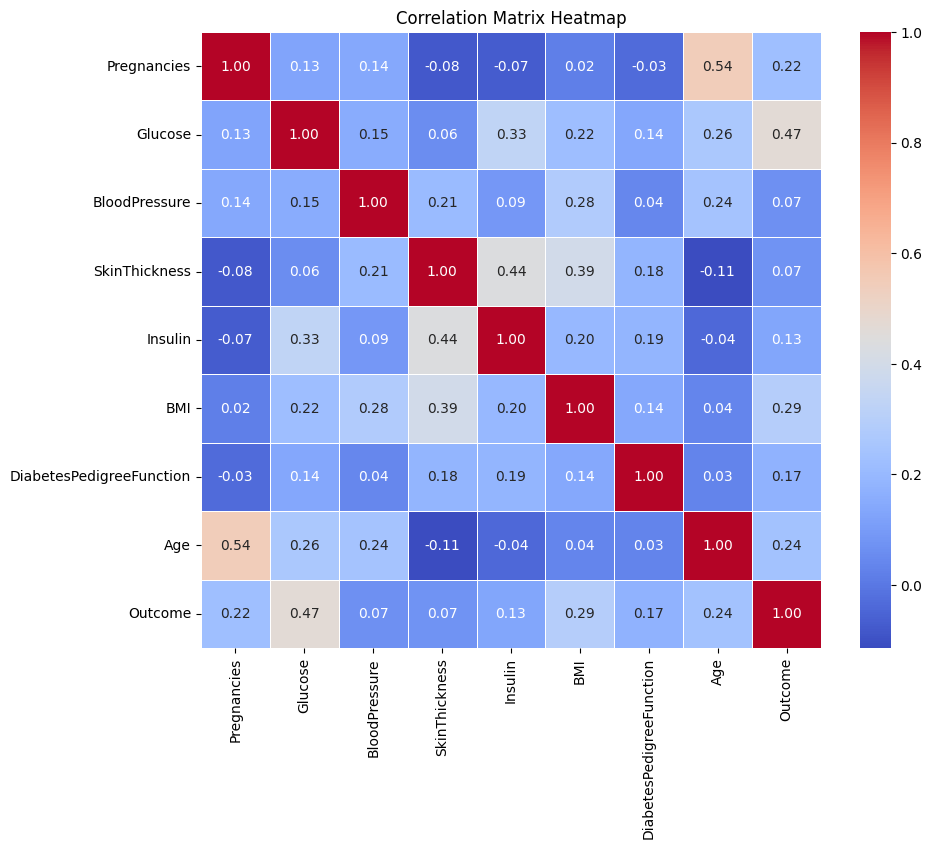

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8)) # Set a good figure size for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

AI prompt:Show me the correlation matrix of the DataFrame

This displays a correlation matrix of how each feature may be linked with each other and the outcome. It displays a value between -1 to +1 to show correlation so the correlation matrix must be correctly formed.

I then wanted to directly be able to visualise the correlation so redisplayed the matrix as a heatmap. It seems to have worked as max postive correlation (1)is shown as bright red and there is a gradient of colour seen.

Possible Correlations to look into witht the outcome:

No of pregnacies - 0.22
Glucose - 0.47
BMI - 0.29

All correlations are above 0 so all features have a positive relationship to outcome (to some extend). So it can be assumed that as each of the features' values increase, the more likely a postive case diagnosed.

AI prompt: Generate a box plot for 'Pregnancies' vs 'Outcome'

I wanted to visiualise the direct correlation between no. of pregnancies and outcome to double check if there is a correlation.

There are two box plots generated for negative (0) and (1) positive outcomes.

Comparing classes:

It appears that the median number of pregnancies is slightly higher for individuals with a 'Diabetes' outcome (Outcome = 1) compared to those with 'No Diabetes' (Outcome = 0).

There is a greater spread for (1) than (0), more individuals with higher numbers of pregnancies are in the diabetic group.


The box plot visually reinforces the positive correlation we saw in the heatmap: individuals with a diabetes diagnosis (Outcome = 1) tend to have a higher number of pregnancies on average compared to those without diabetes. But the correlation isn't as strong as glucose as the spread of (1) is overlapping with (0) so this may be why the correlation score is 0.22 not that high as other features.

Next step: to look at how no. of pregnancies can affect the other features that affect the outcome. Looking at indirect correlations.

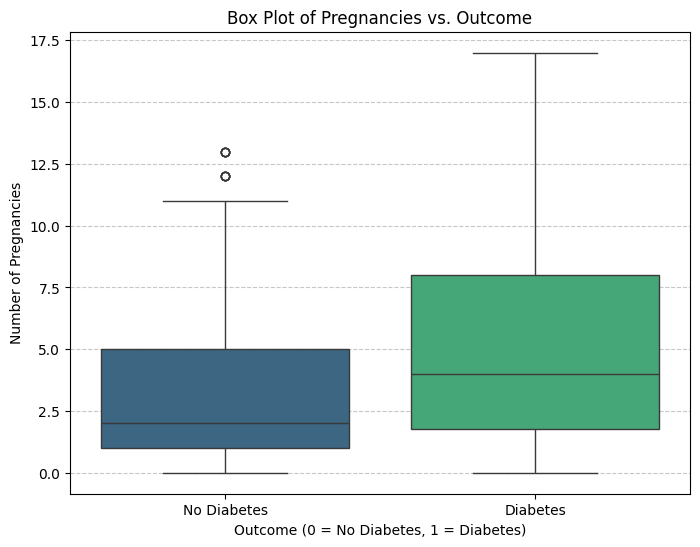

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Pregnancies', data=df, hue='Outcome', palette='viridis', legend=False)
plt.title('Box Plot of Pregnancies vs. Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Number of Pregnancies')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()